In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn import set_config
set_config(display='diagram')
from wordcloud import WordCloud
import folium
import plotly
import warnings
warnings.filterwarnings('ignore')

<Figure size 1152x648 with 0 Axes>

# EDA(Exploring Data and Understanding features doing univariate analysis,Bivariate analysis,Finding Distribution) and Data Cleaning(Finding Types of Features,Duplicate values,Missing Values,Outlier Detection)
# Feature Engineering((Imputting Missing Values,Outlier,handlingImbalanced)) and Feature Selection and Feature Scaling
# Model Selection
# Model Building
# Model HyperParameterTuning
# Model Evaluation(Testing)

In [40]:
df=pd.read_csv(r'C:\Users\91998\Pictures\onlinefraud.csv')

In [41]:
df.shape

(6362620, 11)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1373920,138,PAYMENT,12685.09,C2053551974,20085.0,7399.91,M361271248,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.duplicated().sum()

0

In [10]:
for i in df.columns:
    k = df[i].unique()
    if len(k)<25:
        print(f" data types of {i} is {df[i].dtypes} and  unique values are {df[i].unique()}  ") 
              
        print(" ")
    else:
        print(f"  data types of {i} is {df[i].dtypes} and no of unique values are {df[i].nunique()}")
        
        print(" ")

  data types of step is int64 and no of unique values are 743
 
 data types of type is object and  unique values are ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']  
 
  data types of amount is float64 and no of unique values are 5316900
 
  data types of nameOrig is object and no of unique values are 6353307
 
  data types of oldbalanceOrg is float64 and no of unique values are 1845844
 
  data types of newbalanceOrig is float64 and no of unique values are 2682586
 
  data types of nameDest is object and no of unique values are 2722362
 
  data types of oldbalanceDest is float64 and no of unique values are 3614697
 
  data types of newbalanceDest is float64 and no of unique values are 3555499
 
 data types of isFraud is int64 and  unique values are [0 1]  
 
 data types of isFlaggedFraud is int64 and  unique values are [0 1]  
 


In [11]:
df.select_dtypes(include=np.number).columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [12]:
df.select_dtypes(exclude=np.number).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [13]:
df.dtypes.value_counts()

float64    5
int64      3
object     3
dtype: int64

In [14]:
df.isnull().sum()/len(df)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

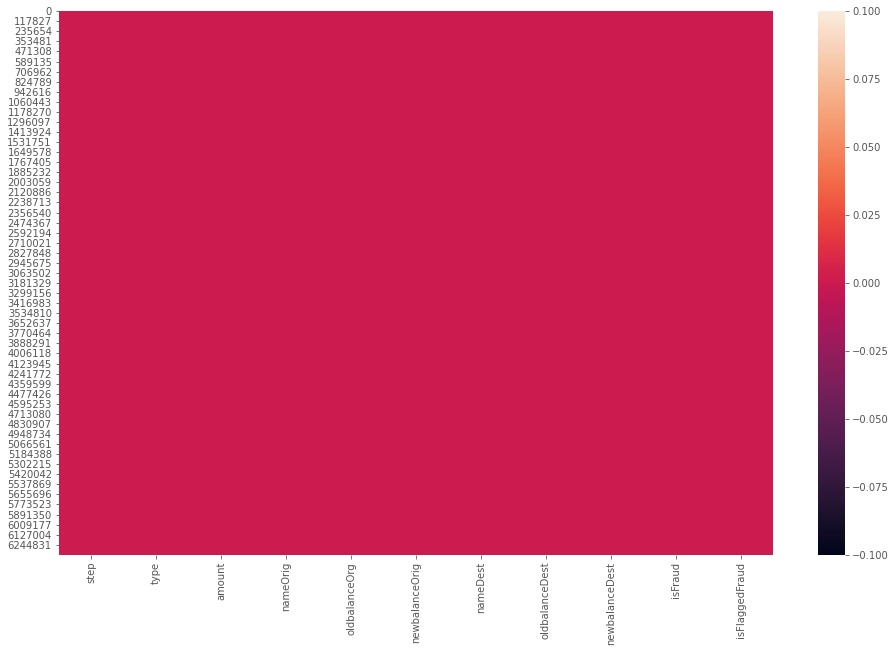

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull());

In [38]:
# outliers_df = pd.DataFrame(columns=df.columns)

# for col in df.select_dtypes(exclude='object'):
#     stat = df[col].describe()
#     print(stat)
#     IQR = stat['75%'] - stat['25%']
#     upper = stat['75%'] + 1.5 * IQR
#     lower = stat['25%'] - 1.5 * IQR
    
#     outliers = df[(df[col] > upper) | (df[col] < lower)]

#     if not outliers.empty:
#         print(f'\nOutlier found in: {col}')
#         outliers_df = pd.concat([outliers_df, outliers])
#     else:
#         print(f'\nNo outlier found in: {col}')

#     print(f'\nSuspected Outliers Lower Bound: {lower}')
#     print(f'Suspected Outliers Upper Bound: {upper}\n\n')

# print(f'Total Number of outlier rows: {len(outliers_df)}')


In [20]:
# def outliers(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1

#     Lower_fence = Q1 - (1.5*IQR)
#     print(f"Lower fence is = {Lower_fence}")

#     Higher_fence = Q3 + (1.5*IQR)
#     print(f"Higher fence is = {Higher_fence}")
      
#     #here i'm taking all Outliers and appending this in Variable "Outlier".
#     Outlier =[]
#     for i in data:
#         if i < Lower_fence:
#             Outlier.append(i)
#             data.drop(data==i)
#         elif i > Higher_fence:
#             Outlier.append(i)


#     #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

#     Index_Outlier = df[data < Lower_fence ].index  
#     Index_Outlier = df[data > Higher_fence].index


#     #Here we are converting all the "Outliers" and "Index_Outliers" into string just to see all the data in One line
#     #If you do print(Outliers) or print(Outliers_index) you will get every element of data in New Line.

#     print(f"\nOutliers = {', '.join([str(x) for x in Outlier])}")
#     print(f"\nOutliers_INDEX = {', '.join([str(x) for x in Index_Outlier ])}")

#     #here we are seeing before and after shape.

#     print(f'\nBEFORE dropping Outlier we have rows = {df.shape[0]}, and columns = {df.shape[1]}')

#     df.drop(Index_Outlier,inplace=True)

#     print(f'AFTER dropping Outlier we have rows = {df.shape[0]}, and columns = {df.shape[1]}')

In [42]:
#outliers(df.select_dtypes(include=np.number))

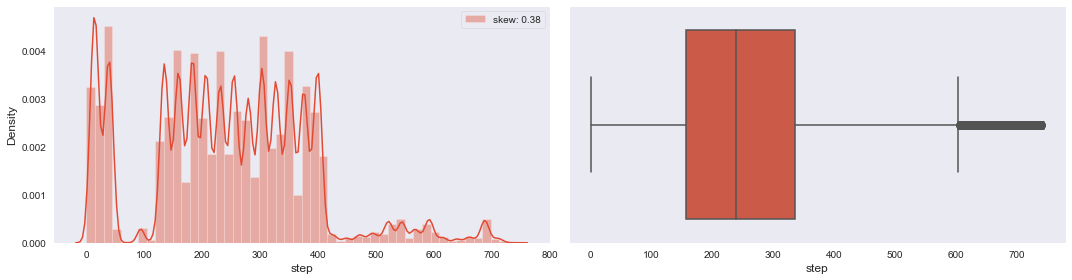

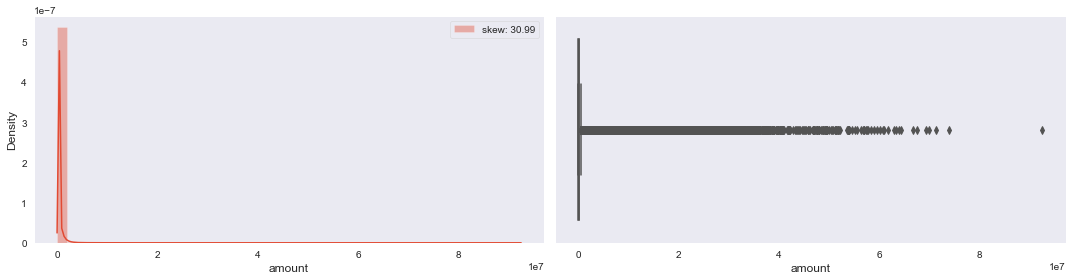

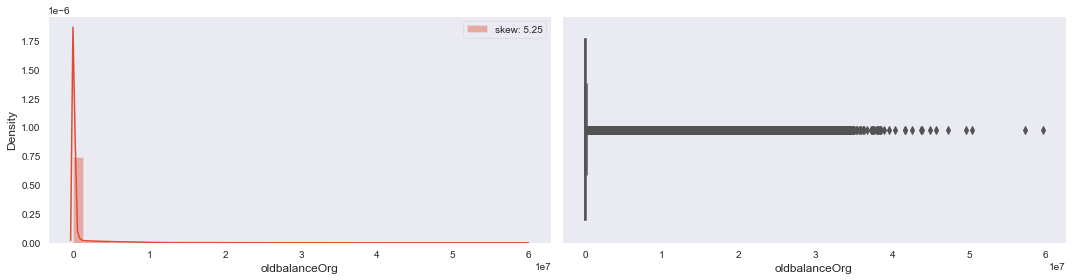

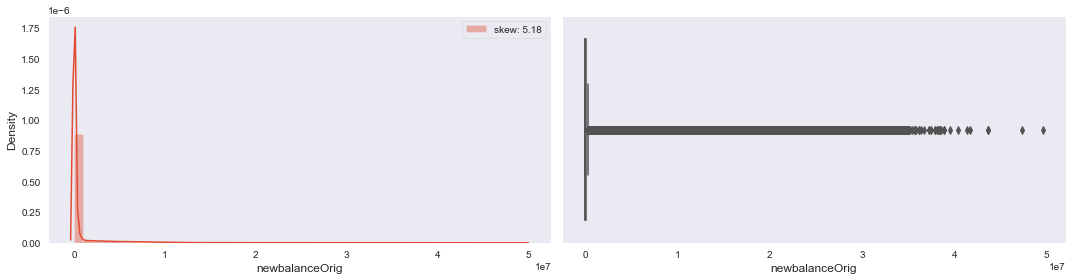

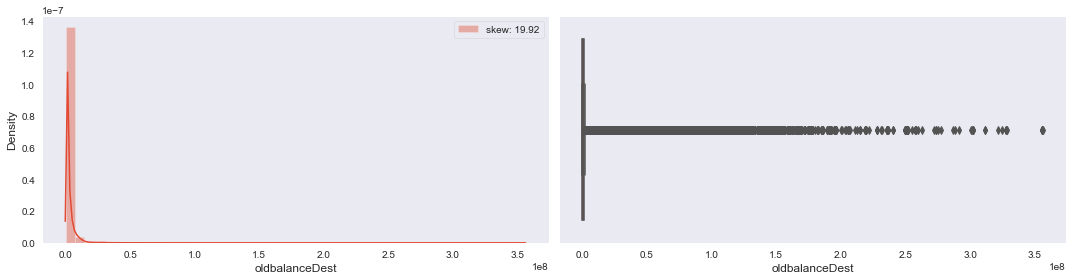

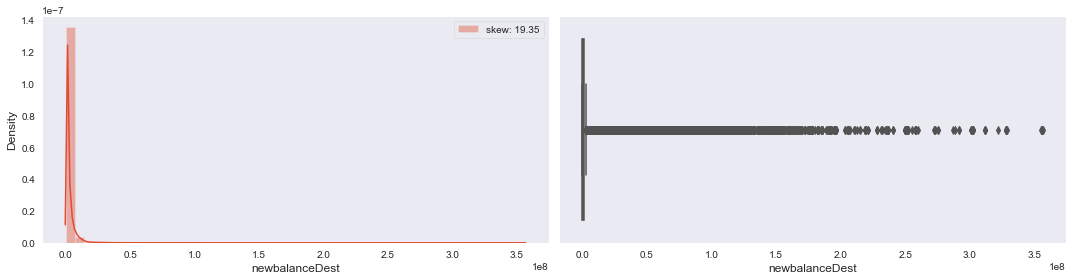

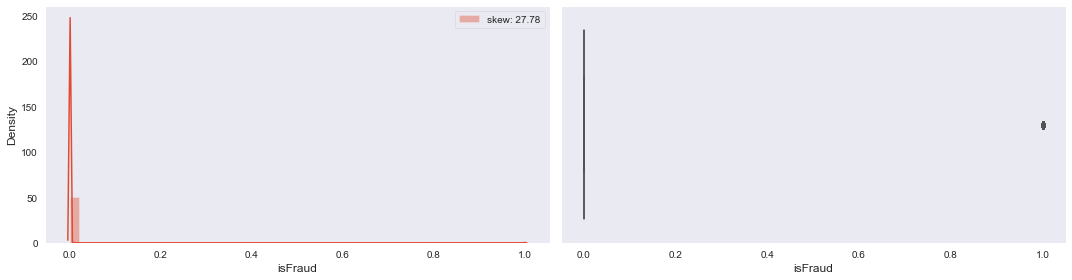

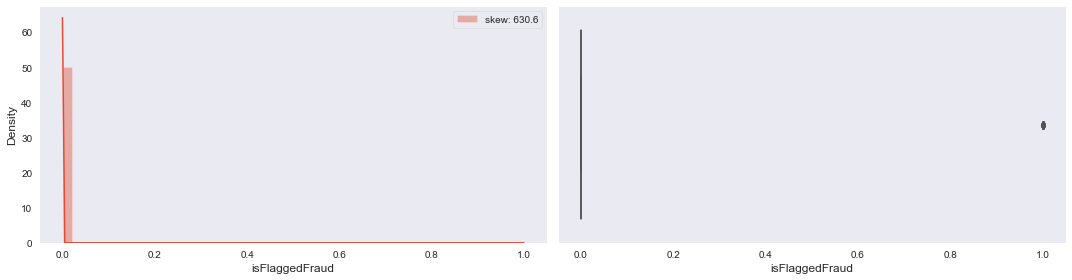

In [46]:
sns.set_style('dark')
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [53]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
952552,44,PAYMENT,9537.06,C1248889342,125699.0,116161.94,M1174246262,0.0,0.0,0,0


In [63]:
def remove_outlier(df_in, col_name):
    
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [64]:
re_dat = remove_outlier(df, 'newbalanceDest')

In [65]:
re_dat.shape

(5624093, 11)

In [34]:
# def outlier_detect(df):
#     for i in df.describe().columns:
#         Q1=df.describe().at['25%',i]
#         Q3=df.describe().at['75%',i]
#         IQR=Q3 - Q1
#         LTV=Q1 - 1.5 * IQR
#         UTV=Q3 + 1.5 * IQR
#         x=np.array(df[i])
#         p=[]
#         for j in x:
#             if j < LTV or j>UTV:
#                 p.append(df[i].median())
#             else:
#                 p.append(j)
#         df[i]=p
#     return df

In [44]:
#outlier_detect(df)

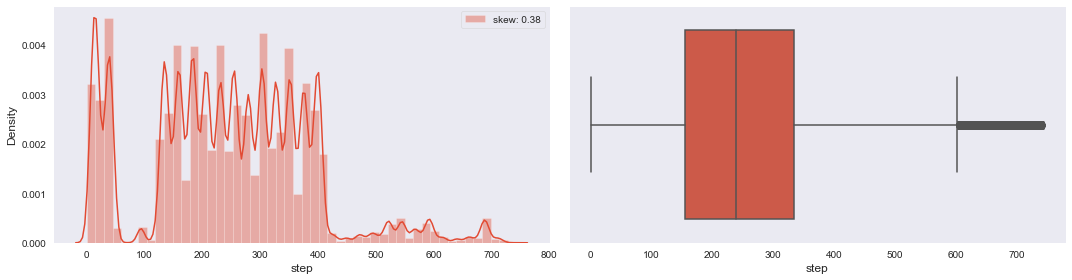

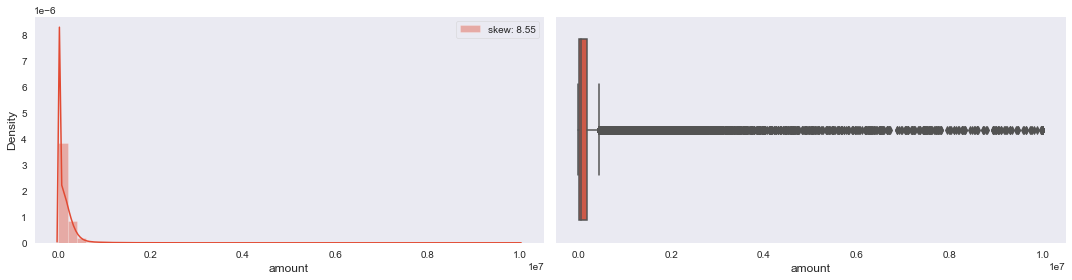

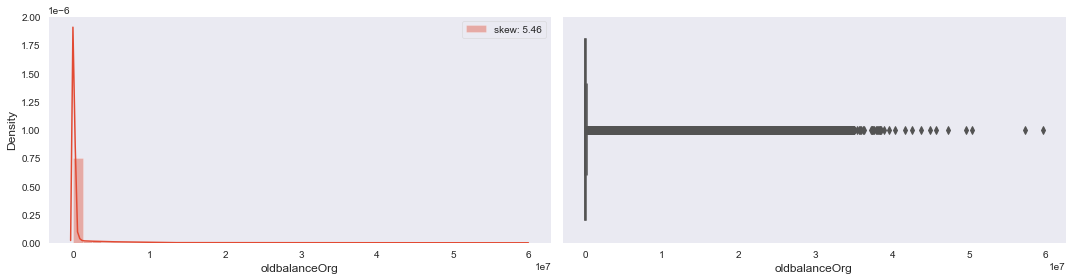

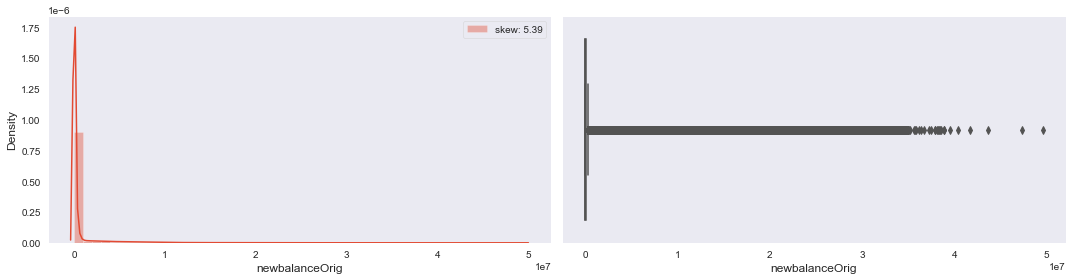

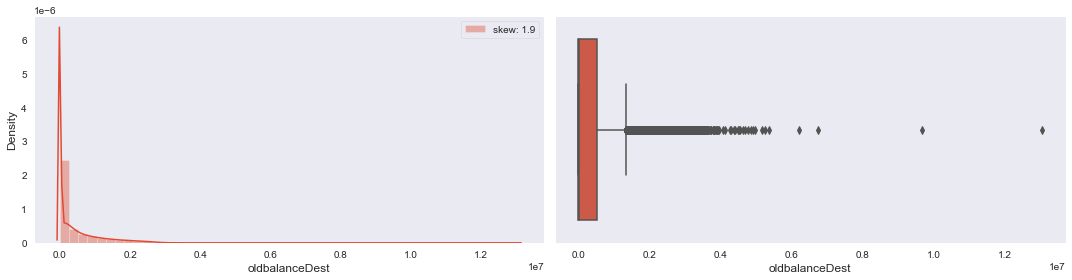

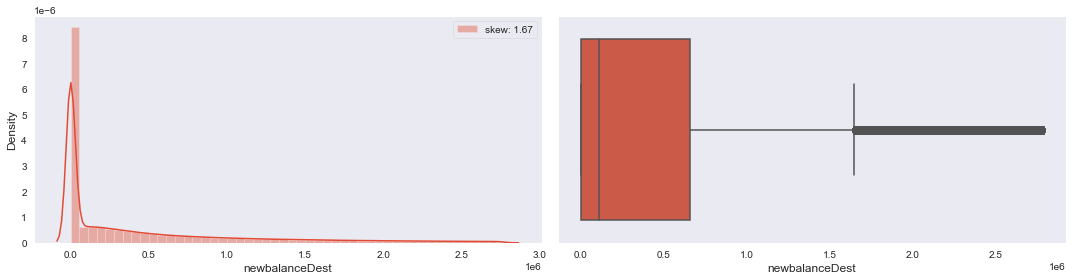

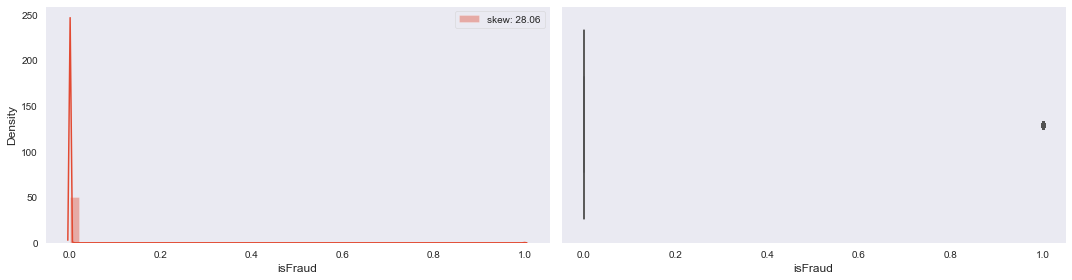

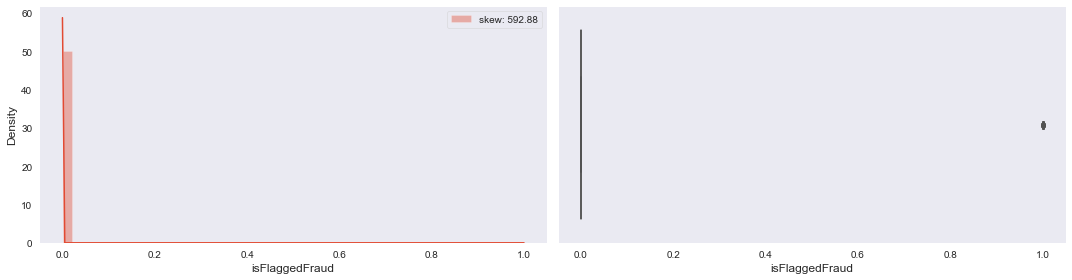

In [66]:
sns.set_style('dark')
for col in re_dat.select_dtypes(exclude='object'):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(re_dat[col], label="skew: " + str(np.round(re_dat[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(re_dat[col])
    plt.tight_layout()
    plt.show()

In [67]:
re_dat['isFraud'].value_counts()

0    5616979
1       7114
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

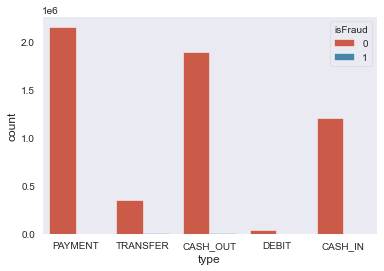

In [68]:
sns.countplot(x='type',hue='isFraud',data=re_dat)

<AxesSubplot:xlabel='type'>

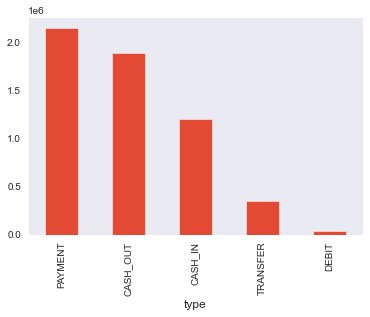

In [69]:
re_dat.groupby('type')['isFraud'].count().sort_values(ascending=False).plot(kind='bar')

In [70]:
re_dat.corr()['isFraud']

step              0.031027
amount            0.166082
oldbalanceOrg     0.006399
newbalanceOrig   -0.007294
oldbalanceDest   -0.014300
newbalanceDest   -0.004597
isFraud           1.000000
isFlaggedFraud    0.047395
Name: isFraud, dtype: float64

<AxesSubplot:>

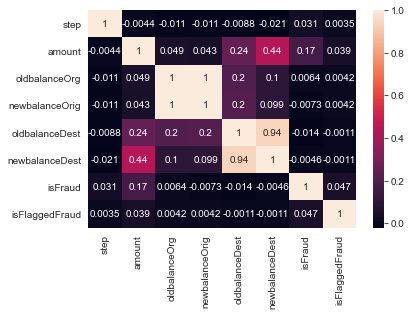

In [71]:
sns.heatmap(re_dat.corr(),annot=True)

In [73]:
re_dat.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3931164,285,PAYMENT,7089.33,C1672078737,437925.0,430835.67,M1090534312,0.0,0.0,0,0


In [74]:
re_dat = re_dat[['type','amount','oldbalanceOrg','newbalanceOrig','isFraud']]

In [82]:
re_dat.shape

(5624093, 5)

In [75]:
num_feature = re_dat.drop('isFraud',axis=1).select_dtypes(include=np.number).columns
cat_feature = re_dat.select_dtypes(exclude=np.number).columns

In [76]:
numeric_transformer = Pipeline(
     steps=[ ("imputer", SimpleImputer(strategy='median'))
               , ("scaler", StandardScaler())
           ]
 )
numeric_transformer


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [77]:
categorical_transformer = Pipeline(
     steps=[
         ("imputer_cat", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ("scaler", StandardScaler())
               ]
)
categorical_transformer

Pipeline(steps=[('imputer_cat', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaler', StandardScaler())])

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
         ("num", numeric_transformer, num_feature),
         ("cat", categorical_transformer, cat_feature),
     ]
 )
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['amount', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['type'], dtype='object'))])

In [79]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
            ("model", XGBClassifier()
           
           )
          ]
 )

In [80]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='i...
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None,
                               reg_alpha=None, reg_lambda=None,
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parameters=None,
                               verbosity=None))])

In [83]:
X=re_dat.drop(columns=['isFraud'])

In [84]:
X.shape

(5624093, 4)

In [85]:
y=re_dat['isFraud']

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

[04:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.999584288536593

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [89]:
os=RandomOverSampler(0.90)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

Original dataset shape Counter({0: 4493538, 1: 5736})
Resampled dataset shape Counter({0: 4493538, 1: 4044184})


In [90]:
# train
pipe.fit(X_train_ns,y_train_ns)

[10:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['amount', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='i...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='approx', validate_parameters=1,
                               verbosity=None))])

In [91]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train_ns)

0.9972893416629698

In [ ]:
#accuracy on test
accuracy_score(y_test,y_pred)

In [1]:
#accuracy on train
accuracy_score(y_train_ns,y_train_pred)

In [94]:
cf_matrix=confusion_matrix(y_test,y_pred)

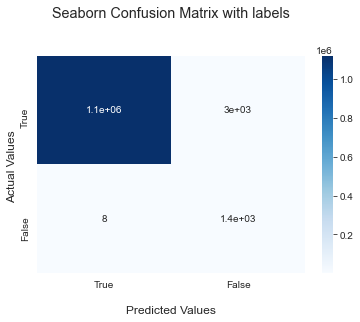

In [95]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [96]:
log_loss(y_test,y_pred)

0.0936249839341877